In [1]:
from toscaparser.tosca_template import ToscaTemplate

#tosca_file = "/srv/jupyter/notebook/tosca_model/csar_elk/mongo-elk.yaml"
tosca_file = "/srv/jupyter/notebook/tosca_model/tosca_elk/Definitions/tosca_elk.yaml"
#tosca_file = "/srv/jupyter/notebook/tosca_model/csar_leonardo/templates/leonardo_aio.yaml"

tosca_model = ToscaTemplate(tosca_file, None, True)

version = tosca_model.version
if tosca_model.version:
    print ("\nVersion: " + version)

if hasattr(tosca_model, 'description'):
    description = tosca_model.description
    if description:
        print ("\nDescription: " + description)

if hasattr(tosca_model, 'inputs'):
    inputs = tosca_model.inputs
    if inputs:
        print ("\nInputs:")
        for input in inputs:
            print ("\t" + input.name)

if hasattr(tosca_model, 'nodetemplates'):
    nodetemplates = tosca_model.nodetemplates
    if nodetemplates:
        print ("\nNode templates:")
        for node in nodetemplates:
            print ("\t" + node.type_definition.ntype + ' "' + node.name + '"')

if hasattr(tosca_model, 'outputs'):
    outputs = tosca_model.outputs
    if outputs:
        print ("\nOutputs:")
        for output in outputs:
            print ("\t" + output.name)



Version: tosca_simple_yaml_1_0

Description: This TOSCA simple profile deploys nodejs, mongodb, elasticsearch, logstash and kibana each on a separate server with monitoring enabled for nodejs server where a sample nodejs application is running. The rsyslog and collectd are installed on a nodejs server.

Inputs:
	github_url
	my_cpus

Node templates:
	tosca.nodes.Database "mongo_db"
	tosca.nodes.SoftwareComponent.Collectd "app_collectd"
	tosca.nodes.Compute "logstash_server"
	tosca.nodes.WebServer "nodejs"
	tosca.nodes.Compute "kibana_server"
	tosca.nodes.WebApplication.PayPalPizzaStore "paypal_pizzastore"
	tosca.nodes.SoftwareComponent.Kibana "kibana"
	tosca.nodes.Compute "elasticsearch_server"
	tosca.nodes.Compute "mongo_server"
	tosca.nodes.SoftwareComponent.Elasticsearch "elasticsearch"
	tosca.nodes.SoftwareComponent.Rsyslog "app_rsyslog"
	tosca.nodes.DBMS "mongo_dbms"
	tosca.nodes.SoftwareComponent.Logstash "logstash"
	tosca.nodes.Compute "app_server"

Outputs:
	kibana_url
	mongodb

In [2]:
print ("Graph model nodes:")
tosca_model.graph.nodetemplates

Graph model nodes:


In [3]:
print ("Graph vertices:")
for vertex_name, vertex in tosca_model.graph.vertices.iteritems():
    print "\n" + vertex.type_definition.ntype + ' "' + vertex.name + '"'
    nodes = vertex.related
    for node_name, node in nodes.iteritems():
        print "\t" + node_name.name

Graph vertices:

tosca.nodes.Database "mongo_db"
	mongo_dbms

tosca.nodes.SoftwareComponent.Collectd "app_collectd"
	app_server
	logstash

tosca.nodes.Compute "logstash_server"

tosca.nodes.WebServer "nodejs"
	app_server

tosca.nodes.Compute "kibana_server"

tosca.nodes.WebApplication.PayPalPizzaStore "paypal_pizzastore"
	mongo_db
	nodejs

tosca.nodes.SoftwareComponent.Kibana "kibana"
	kibana_server
	elasticsearch

tosca.nodes.Compute "elasticsearch_server"

tosca.nodes.Compute "mongo_server"

tosca.nodes.SoftwareComponent.Elasticsearch "elasticsearch"
	elasticsearch_server

tosca.nodes.SoftwareComponent.Rsyslog "app_rsyslog"
	app_server
	logstash

tosca.nodes.DBMS "mongo_dbms"
	mongo_server

tosca.nodes.SoftwareComponent.Logstash "logstash"
	logstash_server
	elasticsearch

tosca.nodes.Compute "app_server"


In [4]:
import networkx as nx
import graphistry

tosca_graph=nx.Graph()

for vertex_name, vertex in tosca_model.graph.vertices.iteritems():
    tosca_graph.add_node(vertex.name)

for vertex_name, vertex in tosca_model.graph.vertices.iteritems():
    nodes = vertex.related
    for node, relationship in nodes.iteritems():
        tosca_graph.add_edge(vertex.name,node.name)

print "\nGraph nodes:"
print tosca_graph.nodes()

print "\nGraph edges:"
print tosca_graph.edges()



Graph nodes:
['mongo_db', 'app_collectd', 'logstash_server', 'nodejs', 'kibana_server', 'paypal_pizzastore', 'kibana', 'elasticsearch_server', 'mongo_server', 'elasticsearch', 'app_rsyslog', 'mongo_dbms', 'logstash', 'app_server']

Graph edges:
[('mongo_db', 'mongo_dbms'), ('mongo_db', 'paypal_pizzastore'), ('app_collectd', 'logstash'), ('app_collectd', 'app_server'), ('logstash_server', 'logstash'), ('nodejs', 'paypal_pizzastore'), ('nodejs', 'app_server'), ('kibana_server', 'kibana'), ('kibana', 'elasticsearch'), ('elasticsearch_server', 'elasticsearch'), ('mongo_server', 'mongo_dbms'), ('elasticsearch', 'logstash'), ('app_rsyslog', 'logstash'), ('app_rsyslog', 'app_server')]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

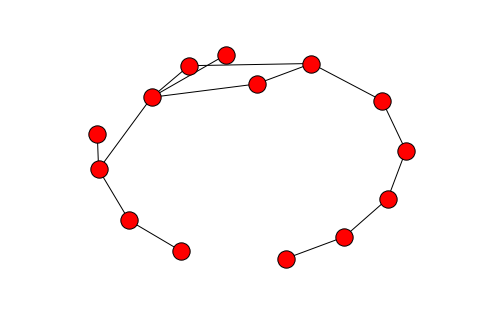

In [6]:
plt.figure(figsize=(6,4));
nx.draw(tosca_graph)

In [7]:
from networkx.readwrite import json_graph
import json

data = json_graph.node_link_data(tosca_graph)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [8]:
%%html
<div id="d3-tosca-model"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [9]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 300,
        height = 300;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-tosca-model").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-tosca-model").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});

<IPython.core.display.Javascript object>